In [ ]:
Objectives :-
1]In which category do people book the most uber rides
2]for which purpose do people book uber rides the most 
3]at what time do people book cabs the most from uber
4]in which months do people book uber rides less frequently
5]on which day of week do people book uber rides the most
6]how many miles do people usually book a cab for througn uber

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
rst = pd.read_csv("Uber Drives.csv")
rst

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Data Preprocessing & Cleaning

In [4]:
rst.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
rst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
rst.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [20]:
#In purpose columns there are 503 null values ,so first we deal with these null values

rst['PURPOSE*'].fillna("Empty",inplace=True)


In [21]:
#Change the datatype of start date and end date -object to date
rst['START_DATE*'] = pd.to_datetime(rst['START_DATE*'],errors='coerce')

In [22]:
rst['END_DATE*'] = pd.to_datetime(rst['END_DATE*'],errors='coerce')

In [29]:
rst.tail(5) # 1155 row contain all null values so we drop that row 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [33]:
#we extract the date and time in different columns 
from datetime import datetime
rst['date'] = pd.DatetimeIndex(rst['START_DATE*']).date
rst['time'] = pd.DatetimeIndex(rst['START_DATE*']).hour

In [35]:
# we make new column which determine time in timestamp like morning ,afternoon.........
rst['timestamp'] = pd.cut(x=rst['time'],bins=[0,10,15,19,24],labels=['morning','afternoon','evening','night'])

In [49]:
#To fill the null values in timestamp
rst['timestamp'].fillna(''"morning",inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3532\153695133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rst['timestamp'].fillna(''"morning",inplace=True)


In [91]:
rst.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,timestamp
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Empty,2016-01-02,1,night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,afternoon


In [52]:
rst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     1155 non-null   object        
 7   date         1155 non-null   object        
 8   time         1155 non-null   int32         
 9   timestamp    1155 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 78.2+ KB


From above information we observed all null values are managed and we change datatype accordingly

# Data Visualization

1]In which category do people book the most uber rides

In [54]:
rst['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

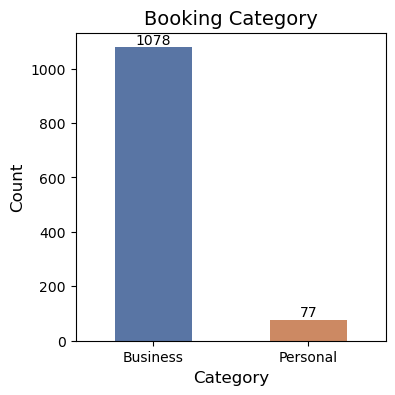

In [74]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='CATEGORY*',data=rst,width=0.5,hue='CATEGORY*',palette='deep')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Booking Category",fontsize=14)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

Conclusion--From above graph we can conclude that people mostly use uber for Business purpose.......

2]for which purpose do people book uber rides the most

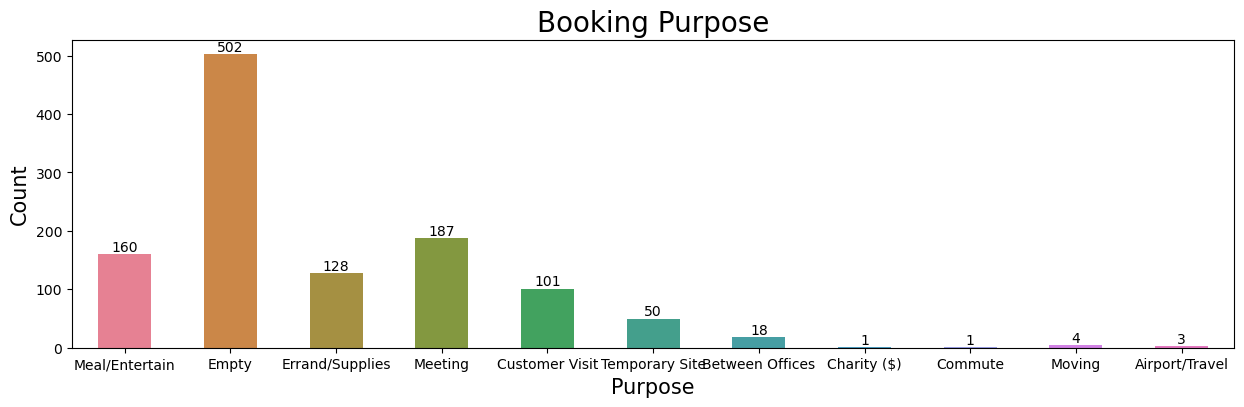

In [88]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x='PURPOSE*',data=rst,hue='PURPOSE*',width=0.5)
plt.title("Booking Purpose",fontsize=20)
ax.set_xlabel("Purpose",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Conclusion--  Most of People not filled the purpose of ride booking.According to above graph highest count of purposes are empty then people use ride for meeting and entertain purpose

3]at what time do people book cabs the most from uber

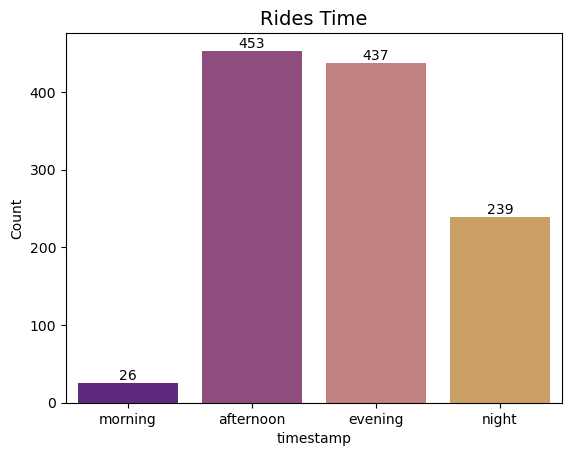

In [99]:
ax = sns.countplot(x='timestamp',data=rst,hue='timestamp',palette='plasma',saturation=0.5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Rides Time",fontsize=14)
ax.set_xlabel("timestamp",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
plt.show()

conclusion -- By referring above graphs we conclude that mostly customer prefer ride at 'afternoon' and 'evening' in between 10 to 7.

4] In which months do people book uber rides less frequently

In [100]:
# To display month we have to extract month from start date column
rst['month'] = pd.DatetimeIndex(rst['START_DATE*']).month #extract month from date

month_label = {1.0:'jan',2.0:'feb',3.0:'mar',4.0:'apr',5.0:'may',
               6.0:'jun',7.0:'july',8.0:'aug',9.0:'sep',
               10.0:'oct',11.0:'nov',12.0:'dec'}

rst['month'] = rst.month.map(month_label)
mon = rst.month.value_counts(sort=False)


In [102]:
rst['month'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

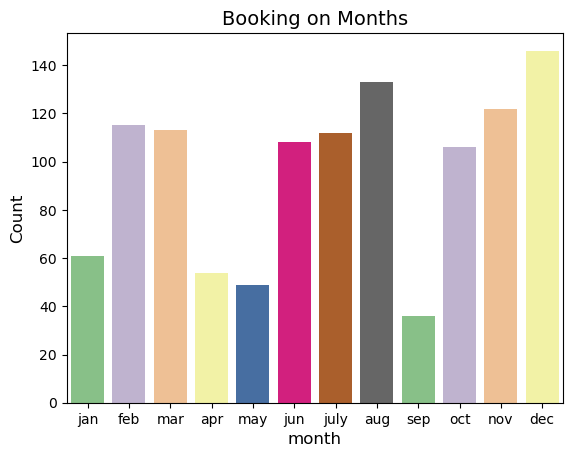

In [114]:
ax = sns.countplot(x='month',data=rst,hue='month',palette='Accent')
plt.title("Booking on Months",fontsize=14)
ax.set_xlabel("month",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
plt.show()

Conclusion -- Above graph represents the count of booking according to month ,so according to question in september people book less rides & in december month people book more rides compare to other months

5] On which day of week do people book uber rides the most

In [116]:
# To display day we have to extract day from start date column
rst['day'] = pd.DatetimeIndex(rst['START_DATE*']).weekday #extract month from date

day_label = {1:'mon',2:'tues',3:'wed',4:'thur',5:'fri',
               6:'sat',7:'sun'}

rst['day'] = rst['day'].map(day_label)
#mon = rst.month.value_counts(sort=False)


In [117]:
rst['day'].unique()

array(['thur', 'fri', 'mon', 'tues', 'wed', 'sat', nan], dtype=object)

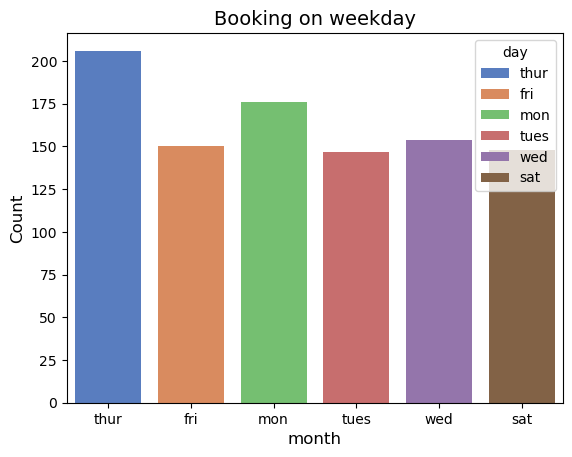

In [124]:
ax = sns.countplot(x='day',data=rst,hue='day',palette='muted')
plt.title("Booking on weekday",fontsize=14)
ax.set_xlabel("month",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
plt.show()

Conclusion -- Thursday is a day in a week on which people booked more rides

6] How many miles do people usually book a cab for througn uber

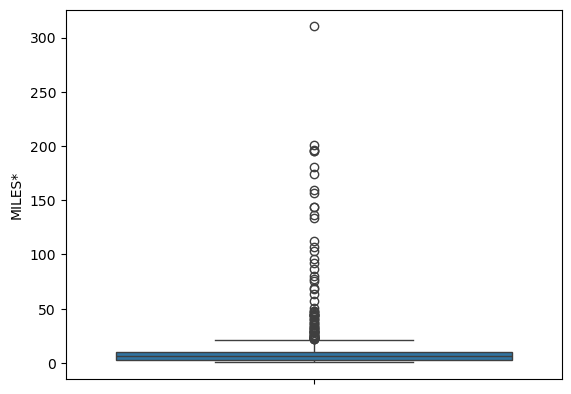

In [129]:
sns.boxplot(y='MILES*',data=rst)
plt.show()

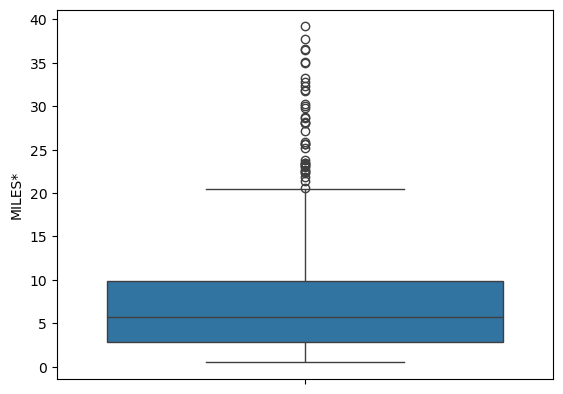

In [132]:
sns.boxplot(rst[rst['MILES*']<40]['MILES*'])
plt.show()

Conclusion -- By above boxplot we conclude that mostly people prefer Uber rides for 0 to 20 Miles

# Conclusions according to Objectives